<a href="https://colab.research.google.com/github/Madhyama-Singh/covid19-india-ml-classification/blob/main/2_ML_Severity_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJECTIVE 2:

* Objective:
The goal was to classify Indian states/UTs based on Covid-19 severity levels (Low, Medium, High) using machine learning models.
The models used were Naive Bayes and K-Nearest Neighbors (KNN, k=5).

* Dataset contains 36 rows and 9 columns

# DATA PREPROCESING:

##IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file_path = "/content/Latest Covid-19 India Status.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10502,40,10333,129,0.38,98.39,1.23,100896618
1,Andhra Pradesh,2333710,1453,2317524,14733,0.06,99.31,0.63,128500364
2,Arunachal Pradesh,66246,295,65655,296,0.45,99.11,0.45,658019
3,Assam,741541,4006,729513,8022,0.54,98.38,1.08,290492
4,Bihar,844997,1024,831688,12285,0.12,98.42,1.45,40100376


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


In [ ]:
df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,1.227074e+06,3661.305556,1.208780e+06,14632.555556,0.460556,98.435556,1.103889,3.971861e+07
std,1.813338e+06,3786.588859,1.784934e+06,27063.901871,0.377941,0.687436,0.484050,5.050913e+07
min,1.050200e+04,0.000000,1.033300e+04,4.000000,0.000000,96.110000,0.030000,6.600100e+04
25%,1.049248e+05,649.750000,1.032480e+05,1112.000000,0.197500,98.047500,0.850000,1.695473e+06
50%,6.058710e+05,1915.500000,5.949465e+05,6523.500000,0.380000,98.525000,1.075000,2.410088e+07
75%,1.303242e+06,5713.000000,1.289440e+06,14244.000000,0.532500,98.812500,1.347500,6.979986e+07
max,8.060737e+06,12429.000000,7.900626e+06,148143.000000,1.610000,99.770000,2.290000,2.315026e+08


##TAKING CARE OF MISSING VALUES

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
Population         0
dtype: int64


##HANDLING DUPLICATE DATA:

In [ ]:
# Check for duplicate rows in the dataset
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()

print(f" Number of duplicate rows: {num_duplicates}")

# Display duplicate rows if any exist
if num_duplicates > 0:
    print("Duplicate rows found:")
    print(df[duplicate_rows])
else:
    print(" No duplicate rows found!")


 Number of duplicate rows: 0
 No duplicate rows found!


##CREATING THE TARGET COLUMN:

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Define severity levels based on Active Ratio
def classify_severity(active_ratio):
    if active_ratio < 0.3:
        return "Low"
    elif active_ratio < 0.6:
        return "Medium"
    else:
        return "High"

# Apply classification
df["Severity"] = df["Active Ratio"].apply(classify_severity) #Uses apply() to classify each row.



##ENCODING TARGET VARIABLE

In [ ]:
# Encode severity labels
label_encoder = LabelEncoder() # Converts categorical labels (Low, Medium, High) into numerical values (0,1,2).

df["Severity_Label"] = label_encoder.fit_transform(df["Severity"])

##NORMALIZATION

In [ ]:
# Select features and normalize numerical columns
features = ["Total Cases", "Active", "Discharged", "Deaths", "Active Ratio", "Discharge Ratio", "Death Ratio", "Population"]
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features]) # Normalizes numerical features to scale values between 0 and 1.


##DROPPING NON ESSENTIAL COLUMNS

In [ ]:
# Drop non-essential columns
df_processed = df.drop(columns=["State/UTs", "Severity"])

# Show the processed dataset
df_processed.head()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population,Severity_Label
0,0.000000,0.003218,0.000000,0.000844,0.236025,0.622951,0.530973,0.435673,2
1,0.288589,0.116904,0.292409,0.099427,0.037267,0.874317,0.265487,0.554944,1
2,0.006925,0.023735,0.007011,0.001971,0.279503,0.819672,0.185841,0.002558,2
3,0.090810,0.322311,0.091147,0.054125,0.335404,0.620219,0.464602,0.000970,2
4,0.103661,0.082388,0.104097,0.082902,0.074534,0.631148,0.628319,0.172982,1


Data cleaning ensures that models learn from accurate, meaningful data rather than noise.
Key steps:

Handling Missing Values – Replacing NaN values with the median or mode.
Feature Scaling – Standardizing numerical features for better model performance.
Categorizing Target Variable – Converting "Total Cases" into "Low," "Medium," and "High" severity.
Encoding Categorical Variables – Transforming text data into numerical form (if necessary).


#DATA VISUALIZATION

<ipython-input-11-5bc1c4a704f1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Severity"], palette="viridis")


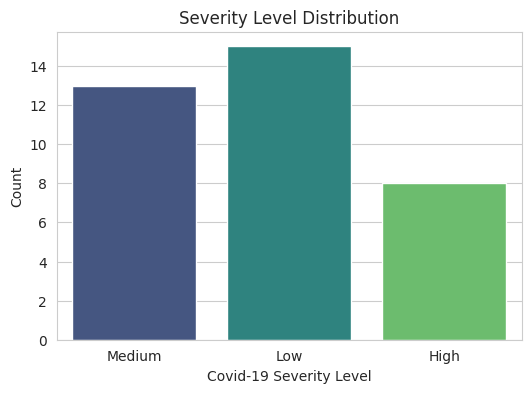

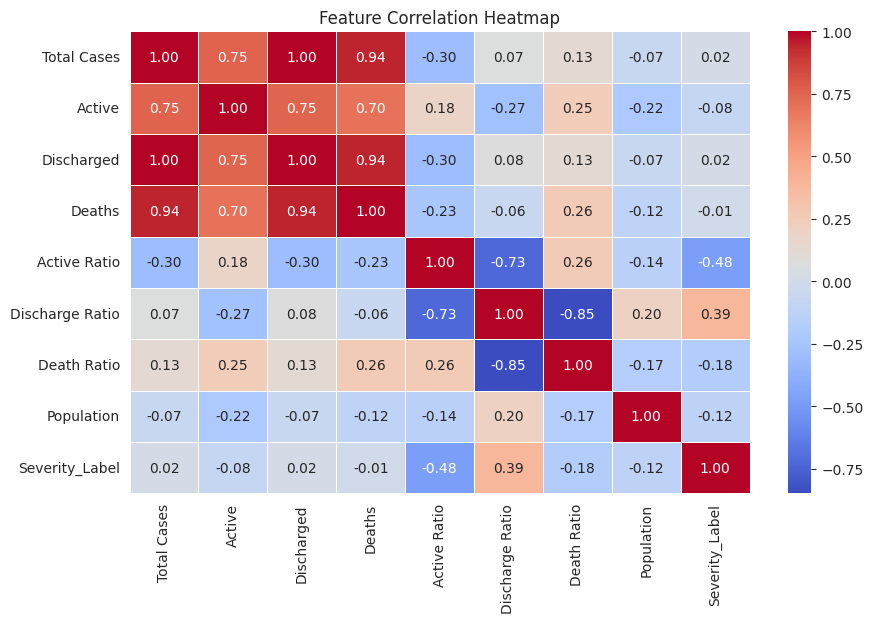

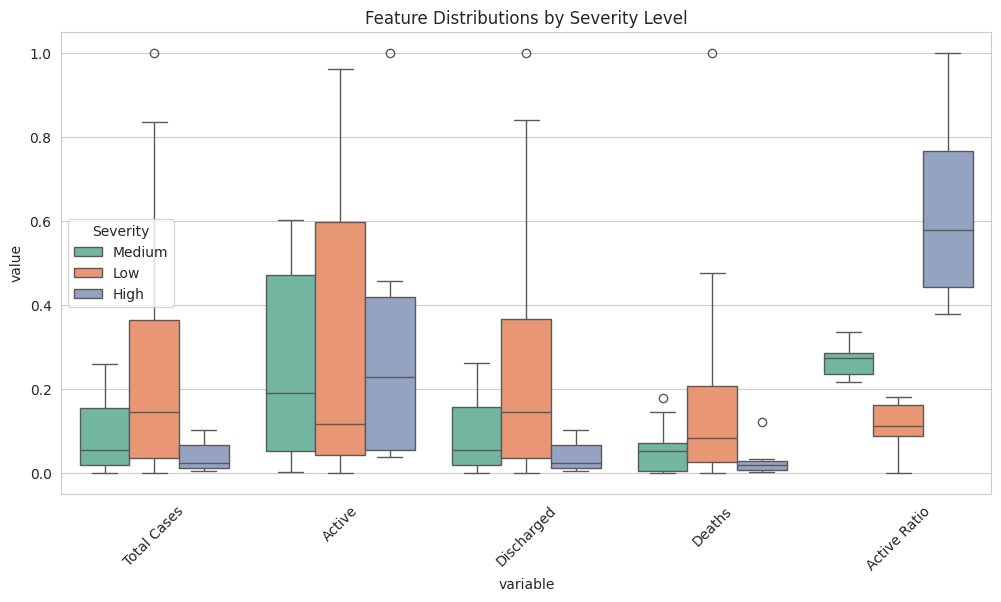

<ipython-input-11-5bc1c4a704f1>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total Cases", y="State/UTs", data=top_10_states, palette="Reds_r")


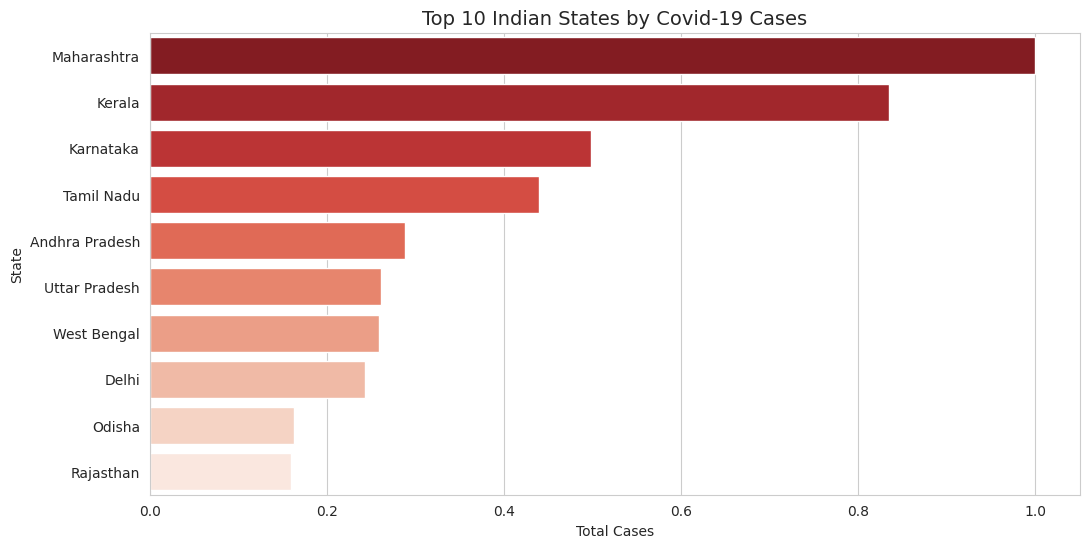

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style("whitegrid")

# 1. Severity Level Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Severity"], palette="viridis")
plt.title("Severity Level Distribution")
plt.xlabel("Covid-19 Severity Level")
plt.ylabel("Count")
plt.show()

# 2. Correlation Heatmap: Feature Selection and Engineering
#How It Helped:
#-Identified highly correlated features to avoid redundancy.
#-Ensured that features with strong relationships with Deaths were retained.
#-Verified that the newly created ratios (Active Ratio, Death Ratio, etc.) contributed meaningfully.
plt.figure(figsize=(10, 6))
sns.heatmap(df_processed.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 4. Boxplots for Feature Distributions by Severity Level
# Showed extreme values that could negatively impact model performance.
# Helped decide whether to remove or transform outliers.
# Ensured the scaled features were normally distributed for KNN.
plt.figure(figsize=(12, 6))
melted_df = df.melt(id_vars=["Severity"], value_vars=["Total Cases", "Active", "Discharged", "Deaths", "Active Ratio"])
sns.boxplot(x="variable", y="value", hue="Severity", data=melted_df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Feature Distributions by Severity Level")
plt.show()

# 5. Bar Plot for total cases per state
plt.figure(figsize=(12, 6))
top_10_states = df.sort_values("Total Cases", ascending=False).head(10)
sns.barplot(x="Total Cases", y="State/UTs", data=top_10_states, palette="Reds_r")
plt.title("Top 10 Indian States by Covid-19 Cases", fontsize=14)
plt.xlabel("Total Cases")
plt.ylabel("State")
plt.show()

### **Insights from the Data Visualization**  

1. **Severity Level Distribution:**
* The dataset contains three severity levels: Low, Medium, and High.
Some classes are more frequent than others, which might affect model predictions.
2. **Correlation Heatmap:**
- Strong correlation observed between:
- Total Cases & Active Cases
- Total Cases & Deaths
- Active Cases & Active Ratio
- Active Ratio and Discharge Ratio show inverse relationships, indicating that as more people recover, active cases decrease.

4. **Boxplot Observations:**  
   - **Total Cases:**  
     - There is a wide spread of total cases, with some states/UTs having significantly higher numbers. These high outliers likely represent heavily affected regions.  
   - **Active Cases:**  
     - The spread of active cases is skewed, indicating that some states/UTs had extremely high numbers compared to the majority.  
   - **Discharged Cases:**  
     - Most states have a high number of discharged cases, indicating a strong recovery trend in many regions.  
   - **Deaths:**  
     - A few states experienced very high fatalities, as indicated by the upper outliers.  
   - **Active Ratio:**  
     - The variability in active ratio suggests that while some states recovered quickly, others continued to have high active case burdens.  


#MODEL BULIDING:

##IMPORTING LIBRARIES

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


##DEFINING DEPENDENT AND INDEPENTENT VARIABLES

In [ ]:
# Define features and target variable
X = df_processed.drop(columns=["Severity_Label"])
y = df_processed["Severity_Label"]

##SPLITTING THE DATA IN TRAIN AND TEST SET

In [ ]:
# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##NAIVE BAYES MODEL

In [ ]:
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

##KNN MODEL

In [ ]:
# Train KNN model (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

#MODEL EVALUATION

In [ ]:
# Evaluate models
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)


In [ ]:
# Display results
accuracy_nb, accuracy_knn, conf_matrix_nb, conf_matrix_knn

(0.75,
 0.625,
 array([[3, 0, 0],
        [1, 2, 0],
        [0, 1, 1]]),
 array([[2, 0, 1],
        [0, 2, 1],
        [0, 1, 1]]))

##CONFUSION MATRIX VISUALIZATION

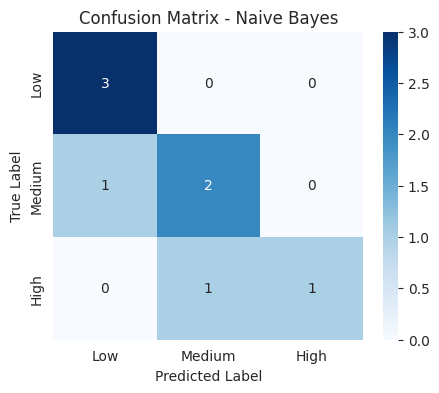

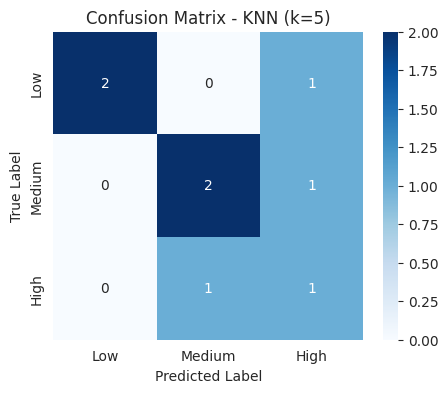

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot confusion matrices for both models
plot_confusion_matrix(conf_matrix_nb, "Naive Bayes")
plot_confusion_matrix(conf_matrix_knn, "KNN (k=5)")


* Naive Bayes performs better for Low severity cases, classifying all 3 correctly, while KNN misclassified one as High.
* Both models classify Medium cases similarly, correctly predicting 2 but misclassifying 1.
* For High severity cases, both models struggle, but Naive Bayes has one fewer misclassification.
* Overall, Naive Bayes appears slightly better in this case, making fewer misclassifications than KNN.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute evaluation metrics for Naive Bayes
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Compute evaluation metrics for KNN
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Display results
(accuracy_nb, precision_nb, recall_nb, f1_nb), (accuracy_knn, precision_knn, recall_knn, f1_knn)


((0.75, 0.78125, 0.75, 0.738095238095238),
 (0.625, 0.7083333333333334, 0.625, 0.65))

Naive Bayes performed better overall across all metrics, achieving higher

*  accuracy (75%) and a better F1-score (73.8%), indicating a more balanced performance.

*   Recall (Naive Bayes: 75% vs. KNN: 62.5%) suggests that Naive Bayes is also better at correctly identifying positive cases (fewer false negatives).


*   Precision (Naive Bayes: 78.1% vs. KNN: 70.8%) shows that Naive Bayes is better
at avoiding false positives.




KNN had lower performance, particularly struggling with recall, meaning it missed more instances of the correct severity level.
*  Final Verdict:
Naive Bayes is the better model for classifying Covid-19 severity levels in this dataset, as it consistently outperformed KNN in all key metrics.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


#EXAMPLE

In [ ]:
# Define the feature names (ensure these match the training data)
feature_names = ["Total Cases", "Active", "Discharged", "Deaths",
                 "Active Ratio", "Discharge Ratio", "Death Ratio", "Population"]

# Sample input data
new_data = [[500000, 20000, 470000, 10000, 4.0, 98.0, 2.0, 35000000]]

# Convert new_data to a DataFrame with correct column names
new_data_df = pd.DataFrame(new_data, columns=feature_names)

# Ensure new data is scaled using the same scaler used in training
new_data_scaled = scaler.transform(new_data_df)  # No need to repeat scaling

# Predict using Naive Bayes
nb_prediction = nb_model.predict(new_data_scaled)
print("Naive Bayes Prediction (0 = Low, 1 = Medium, 2 = High):", nb_prediction[0])

# Predict using KNN
knn_prediction = knn_model.predict(new_data_scaled)
print("KNN Prediction (0 = Low, 1 = Medium, 2 = High):", knn_prediction[0])


Naive Bayes Prediction (0 = Low, 1 = Medium, 2 = High): 0
KNN Prediction (0 = Low, 1 = Medium, 2 = High): 2
